(576, 1024, 4)
(256, 256, 4)


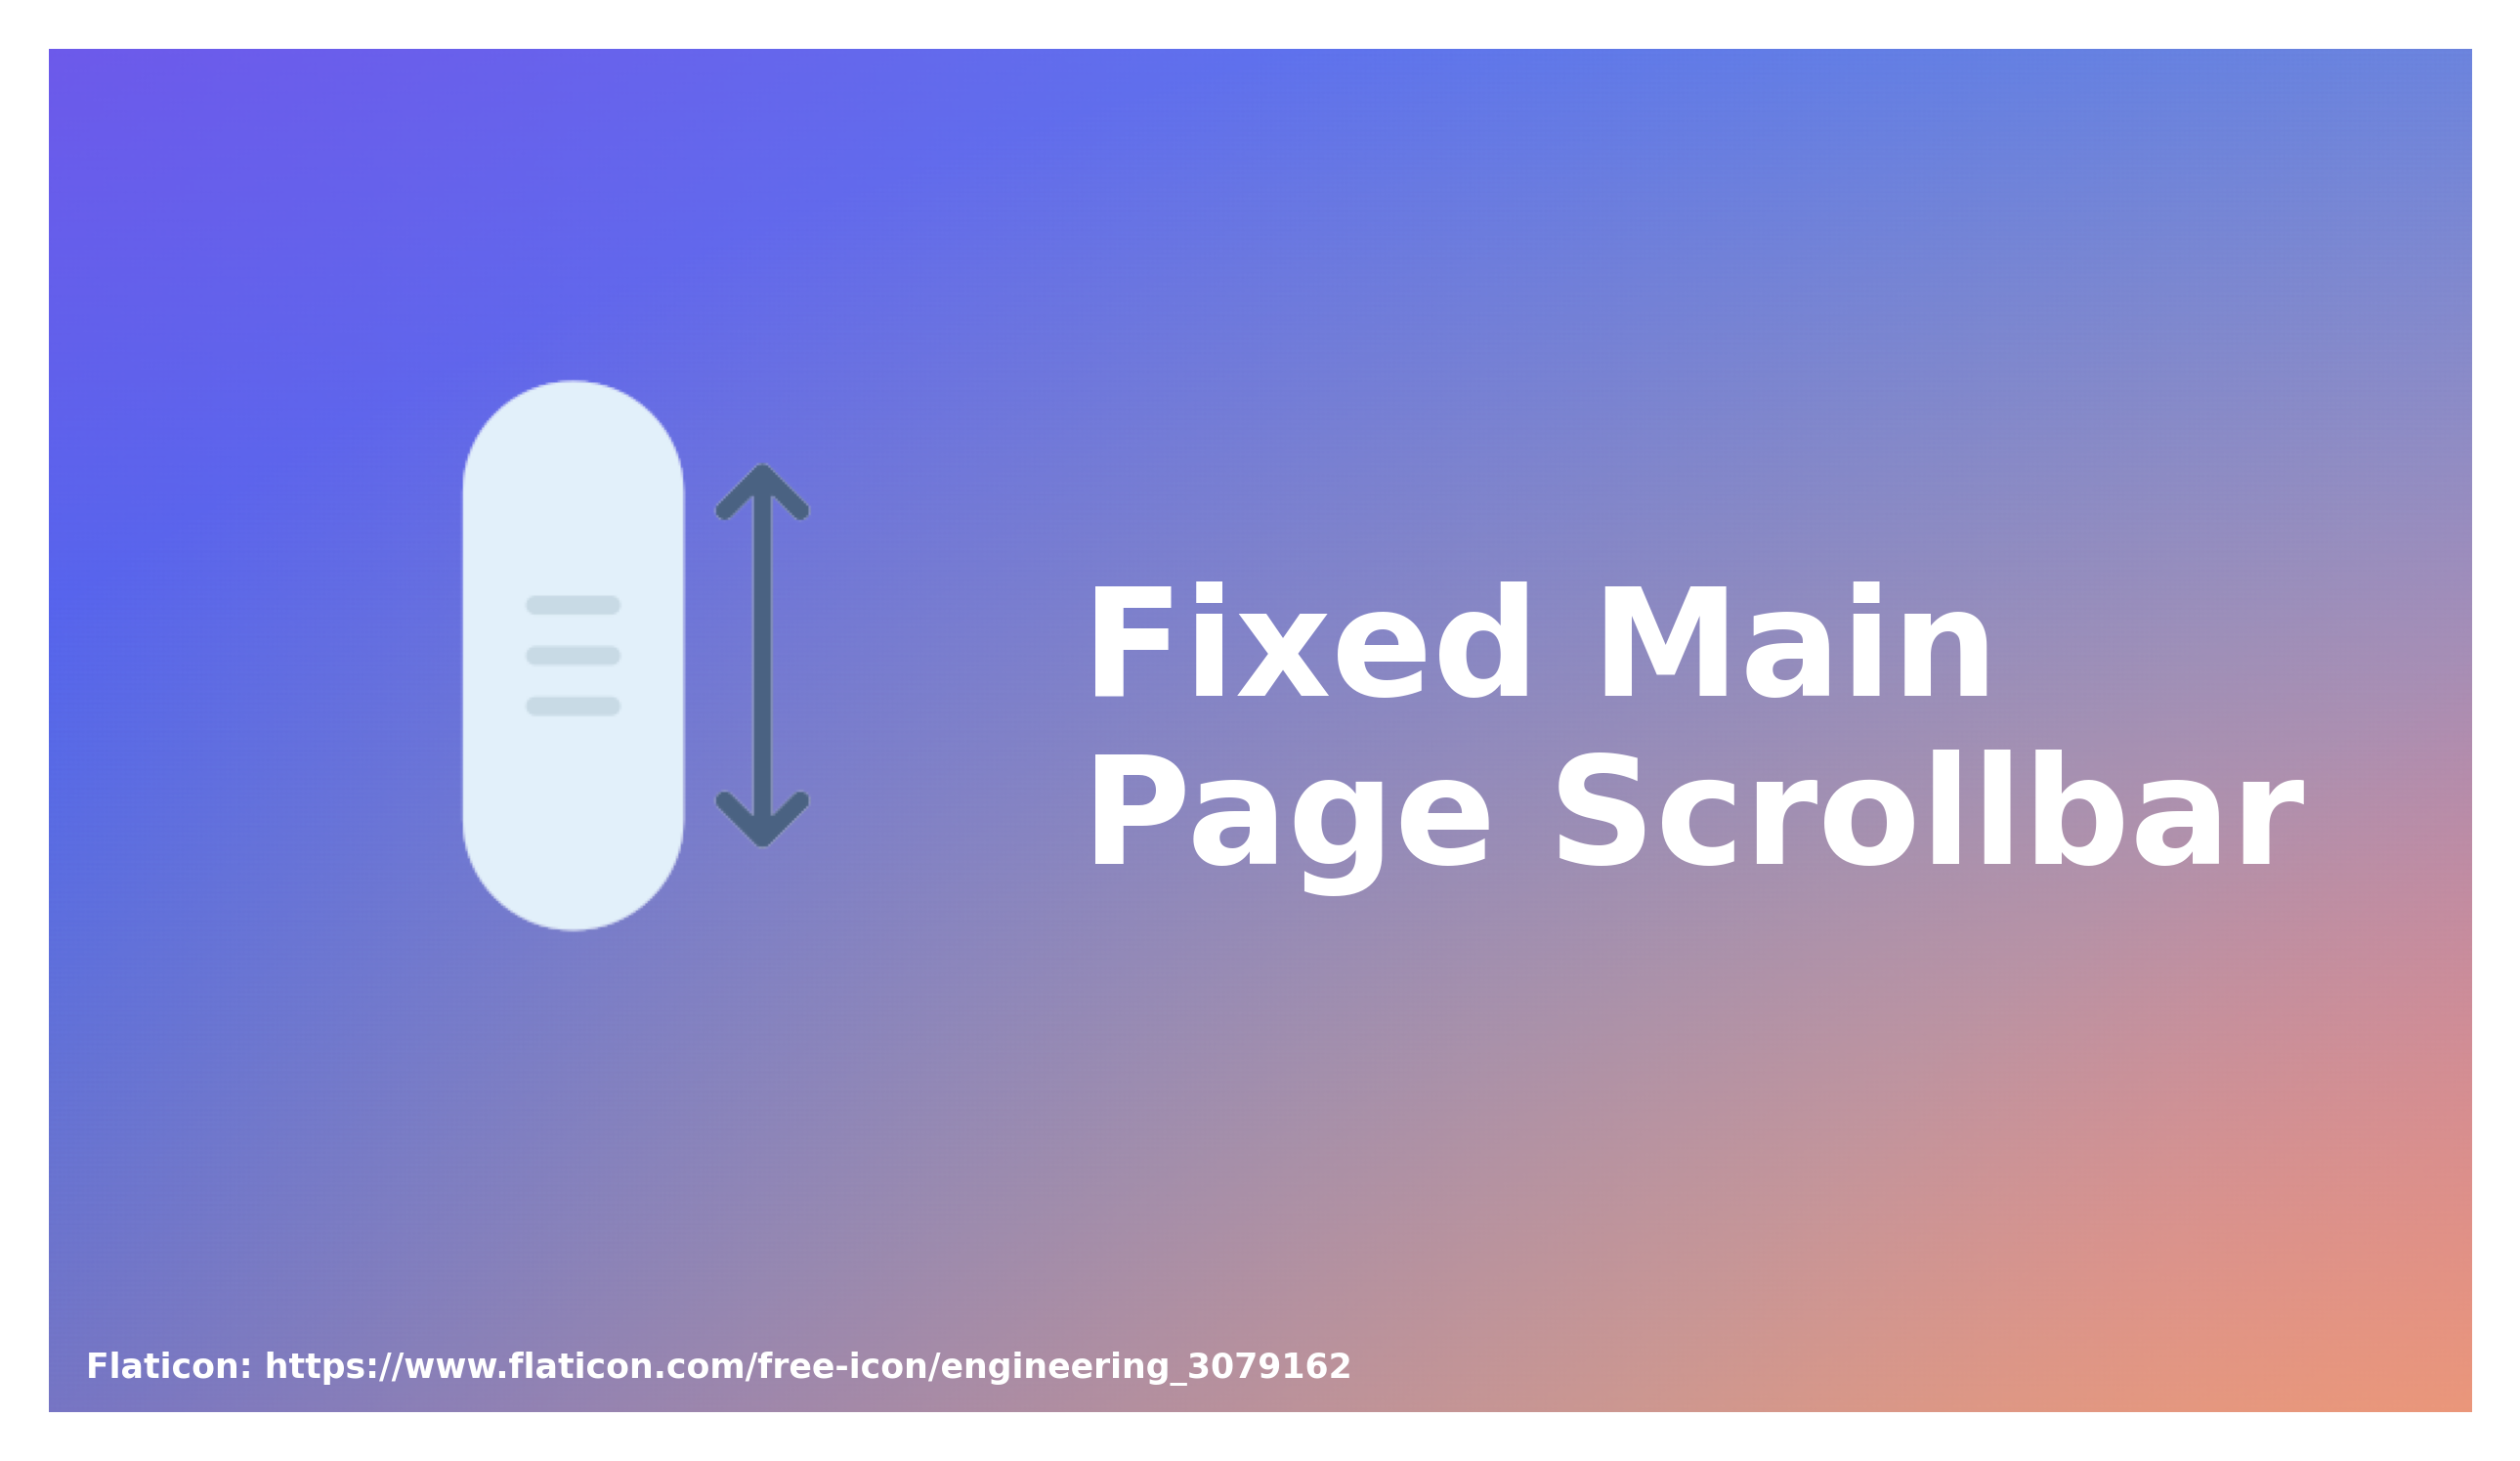

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import json

import requests
from io import BytesIO
response = requests.get('https://github.com/youyinnn/melvor_idle_rich_smith_crafter_and_more/blob/main/bg.png?raw=true')

with open('./src/manifest.json') as f:
    js = json.load(f)

name = js['namespace'].replace('_', ' ').title()
name = name.split(' ')
nn = []

start = 0
end = len(name)
step = 2
for i in range(start, end, step):
    x = i
    nn.append(' '.join(name[x:x+step]))

from PIL import Image
bg = Image.open(BytesIO(response.content))
icon = Image.open('icon.png')
print(np.array(bg).shape)
print(np.array(icon).shape)

bg.paste(icon, (120,128), icon)

plt.figure(dpi = 500)
plt.axis('off')


fontSize = 22
plt.text(120 + 256 + 60, 300 + (fontSize * len(nn)), '\n'.join(nn), dict(size=fontSize, weight = 'bold', color='white'))
plt.text(15, 576 - 15, js['logo_attribution'], dict(size=5, weight = 'bold', color='white'))
plt.imshow(bg)
plt.savefig('logo.png', pad_inches=0, bbox_inches = 'tight')

icon.thumbnail((64,64), Image.Resampling.LANCZOS)
icon.save('src/icon.png', 'png')